In [1]:
import mdtraj as md

In [5]:
from bgmol.datasets import Ala2TSF300

target_energy = Ala2TSF300().get_energy_model(n_workers=1)

Using downloaded and verified file: /tmp/alanine-dipeptide-nowater.pdb


In [7]:
import mdtraj
constrained_traj = mdtraj.load('constrained_samples.dcd', top='ala2_fromURL.pdb')
my_traj = mdtraj.load('obcimplicit.dcd', top='ala2_fromURL.pdb',stride=2863)
TSF_traj = mdtraj.load('TSFtraj.dcd', top='ala2_fromURL.pdb', stride=10000)
print(constrained_traj,my_traj,TSF_traj)

<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells> <mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, and unitcells> <mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells>


In [18]:
def get_energies(trajectory, target_energy):
    coordinates = trajectory.xyz
    data = coordinates.reshape(-1,66)
    return target_energy.energy(data).cpu().detach().numpy()

In [ ]:
coordinates = my_traj.xyz
data = coordinates.reshape()

In [13]:
import matplotlib.pyplot as plt

In [19]:
def plot_energy(ax, constr_data, my_data, TSF_data):
    
    my_energies = get_energies(my_data, target_energy)
    TSF_energies = get_energies(TSF_data, target_energy)
    constr_energies = get_energies(constr_data, target_energy)
    
    ax.set_xlabel("Energy   [$k_B T$]")
    # y-axis on the right
    #ax2 = plt.twinx(ax)
    #ax.get_yaxis().set_visible(False)
    
    ax.hist(my_energies, bins=40, density=False, label="my data")
    ax.hist(constr_energies, bins=40, density=False, label="constr")
    ax.hist(TSF_energies, bins=40, density=False, label="TSF")

    #ax.set_ylabel(f"Count   [#Samples / 1000]")
    ax.legend()

AssertionError: Input at index 0 as wrong shape (3,) instead of torch.Size([66])

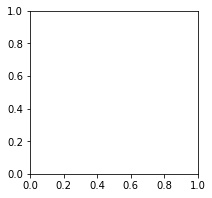

In [20]:
fig, ax = plt.subplots(figsize=(3,3))

plot_energy(ax, constrained_traj,my_traj,TSF_traj)